In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 29.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 18.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.9 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 20.2 MB/s eta 0:00:00:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [7]:
!pip install seaborn
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


/tmp/ipykernel_3734149/1006041324.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Model", y="CER", data=df, palette="Set2", width=0.6, showmeans=True,


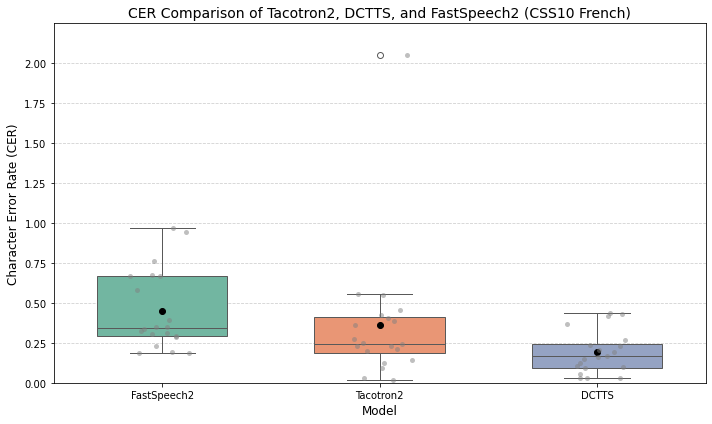

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load CERs from all three systems, skipping empty lines
fs2 = [float(x.strip()) for x in open("/scratch/s6028608/FastSpeech2/css10_cer/fs2_cers.txt") if x.strip()]
tacotron2 = [float(x.strip()) for x in open("/scratch/s6028608/FastSpeech2/css10_cer/tacotron2_cers.txt") if x.strip()]
dctts = [float(x.strip()) for x in open("/scratch/s6028608/FastSpeech2/css10_cer/dctts_cers.txt") if x.strip()]

# Prepare DataFrame for seaborn
data = {
    "CER": fs2 + tacotron2 + dctts,
    "Model": (
        ["FastSpeech2"] * len(fs2) +
        ["Tacotron2"] * len(tacotron2) +
        ["DCTTS"] * len(dctts)
    )
}
df = pd.DataFrame(data)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x="Model", y="CER", data=df, palette="Set2", width=0.6, showmeans=True,
            meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black"})
sns.stripplot(x="Model", y="CER", data=df, color="gray", alpha=0.5, jitter=0.15)

# Titles and labels
plt.title("CER Comparison of Tacotron2, DCTTS, and FastSpeech2 (CSS10 French)", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Character Error Rate (CER)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.ylim(0, max(df["CER"]) + 0.2)

# Save and show
plt.tight_layout()
plt.savefig("task1_1_cer_boxplot.png", dpi=300)
plt.show()
